In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
population_data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_2749138.csv', skiprows=4)
metadata_country = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2749138.csv')
metadata_indicator = pd.read_csv('Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_2749138.csv')

# Display the first few rows of each file
population_data.head(), metadata_country.head(), metadata_indicator.head()


(                  Country Name Country Code     Indicator Name Indicator Code  \
 0                        Aruba          ABW  Population, total    SP.POP.TOTL   
 1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
 2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
 3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
 4                       Angola          AGO  Population, total    SP.POP.TOTL   
 
           1960         1961         1962         1963         1964  \
 0      54608.0      55811.0      56682.0      57475.0      58178.0   
 1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
 2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
 3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
 4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   
 
           1965  ...         2015         2016         2017         2018  \
 0

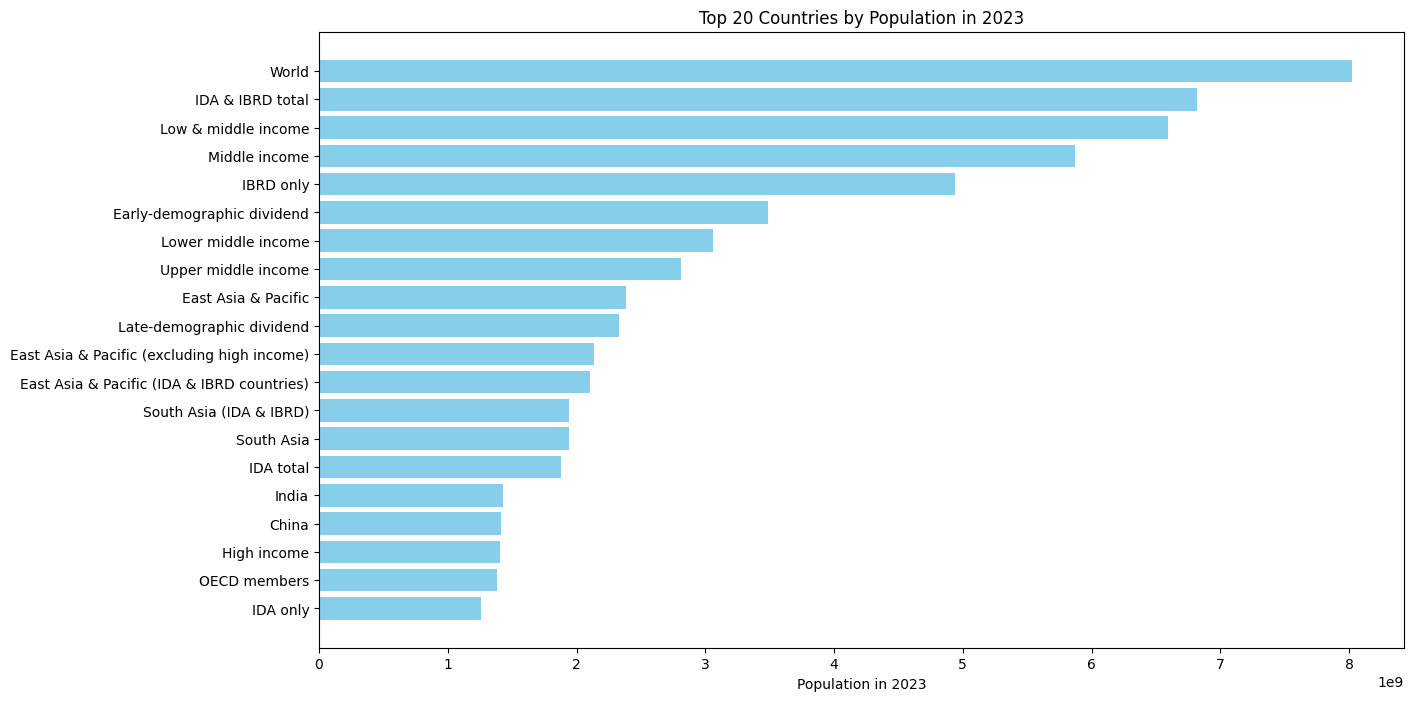

In [4]:
# Filter the population data for the year 2023
population_2023 = population_data[['Country Name', '2023']]

# Remove rows with NaN values in the '2023' column
population_2023 = population_2023.dropna(subset=['2023'])

# Sort the data by population in descending order and take the top 20 countries
top_20_population = population_2023.sort_values(by='2023', ascending=False).head(20)

# Create the bar chart
plt.figure(figsize=(14, 8))
plt.barh(top_20_population['Country Name'], top_20_population['2023'], color='skyblue')
plt.xlabel('Population in 2023')
plt.title('Top 20 Countries by Population in 2023')
plt.gca().invert_yaxis()
plt.show()

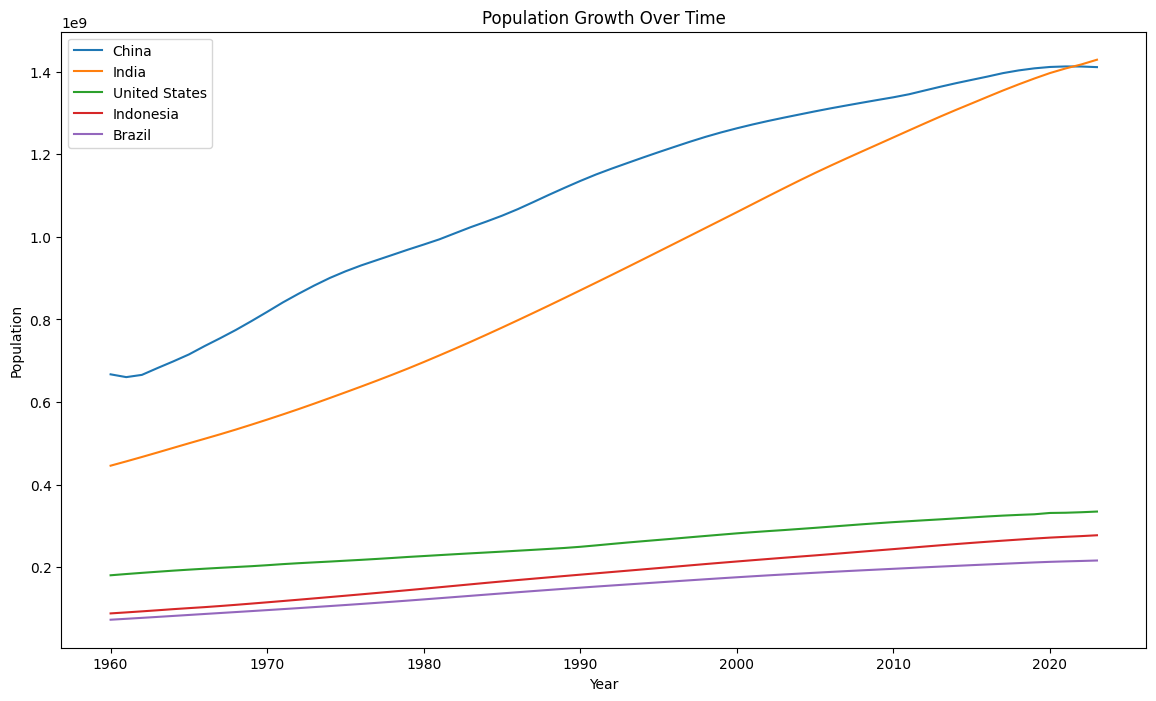

In [5]:
# Select a few countries for comparison
countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']

# Filter the data for these countries
population_growth = population_data[population_data['Country Name'].isin(countries)]

# Set the country name as the index
population_growth.set_index('Country Name', inplace=True)

# Transpose the dataframe to have years as rows and countries as columns
population_growth = population_growth.loc[:, '1960':'2023'].transpose()

# Convert the index to a numeric type (years)
population_growth.index = population_growth.index.astype(int)

# Plot the population growth
plt.figure(figsize=(14, 8))
for country in countries:
    plt.plot(population_growth.index, population_growth[country], label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth Over Time')
plt.legend()
plt.show()


In [13]:
# Filter the population data for the year 2023
population_2023 = population_data[['Country Name', 'Country Code', '2023']]
population_2023 = population_2023.dropna(subset=['2023'])

# Merge population data with country metadata
population_2023_with_metadata = population_2023.merge(metadata_country, on='Country Code')

# Function to display the tables
def display_tables():
    # Table 1: Population for Selected Countries (2023)
    selected_countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
    table_countries = population_2023[population_2023['Country Name'].isin(selected_countries)]
    table_countries = table_countries.sort_values(by='2023', ascending=False)
    print("Population for Selected Countries (2023)")
    print(table_countries)

    # Table 2: Population Distribution by Region (2023)
    table_regions = population_2023_with_metadata.groupby('Region')['2023'].sum().reset_index()
    table_regions = table_regions.sort_values(by='2023', ascending=False)
    print("\nPopulation Distribution by Region (2023)")
    print(table_regions)

    # Table 3: Population Comparison by Income Group (2023)
    table_income_groups = population_2023_with_metadata.groupby('IncomeGroup')['2023'].sum().reset_index()
    table_income_groups = table_income_groups.sort_values(by='2023', ascending=False)
    print("\nPopulation Comparison by Income Group (2023)")
    print(table_income_groups)

display_tables()

Population for Selected Countries (2023)
      Country Name Country Code          2023
109          India          IND  1.428628e+09
40           China          CHN  1.410710e+09
251  United States          USA  3.349149e+08
106      Indonesia          IDN  2.775341e+08
29          Brazil          BRA  2.164224e+08

Population Distribution by Region (2023)
                       Region          2023
0         East Asia & Pacific  2.357228e+09
5                  South Asia  1.938550e+09
6          Sub-Saharan Africa  1.241898e+09
1       Europe & Central Asia  9.239298e+08
2   Latin America & Caribbean  6.641553e+08
3  Middle East & North Africa  5.007873e+08
4               North America  3.750761e+08

Population Comparison by Income Group (2023)
           IncomeGroup          2023
2  Lower middle income  3.059565e+09
3  Upper middle income  2.810588e+09
0          High income  1.379648e+09
1           Low income  7.229841e+08
